# test_bases

Test the bases.py module

Edit, in retrospect: looks like this isnt necessary, since QR decomposition gives us the exact same orthonormal basis; whilst simple matrix multiplication with the basis matrix gives us the projection :-P  Nevertheless, this notebook serves to discover/demonstrate/reassure myself this is the case.

Let's redo the linear least squares projections, to test this module

beta_gt [ 0.30000001]
X.shape (10, 1)
y.shape (10,)


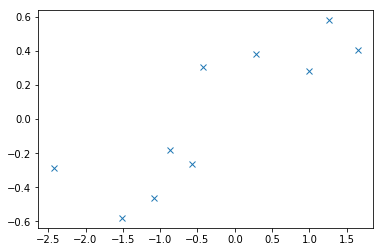

beta_est [ 0.25268061]


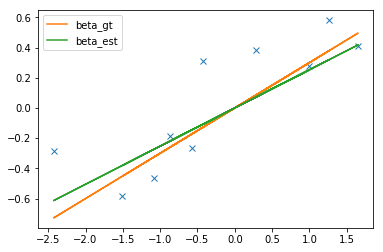

r_beta_gt [-0.13577723 -0.01894179  0.29827793 -0.1277804  -0.08879639 -0.08687026
  0.44118602  0.43735722  0.20081078  0.07723728]
r_beta_est [-0.18714862  0.028252    0.3116683  -0.19905737 -0.11617541 -0.00872526
  0.326357    0.41706133  0.26071413  0.03622364]
sum squares, beta_gt 0.571740043145
sum squares, beta_est 0.535889655606


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import bases


N = 10
K = 1

e = 0.2  # noise term
# _gt => 'ground truth'
beta_gt = np.array([0.3]).astype(np.float32)
print('beta_gt', beta_gt)

np.random.seed(123)
X = np.random.randn(N, K)
print('X.shape', X.shape)
y = X.dot(beta_gt) + np.random.randn(N) * e
print('y.shape', y.shape)


# simple X-y plot:
plt.plot(X[:, 0], y, 'x')
plt.show()

# _est => estimated
beta_est = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
print('beta_est', beta_est)

plt.plot(X[:, 0], y, 'x')
plt.plot(X[:, 0], X.dot(beta_gt), '-', label='beta_gt')
plt.plot(X[:, 0], X.dot(beta_est), '-', label='beta_est')
plt.legend()
plt.show()

# check residual for these two lines, compared to the actual X samples
r_beta_gt = y - X.dot(beta_gt)
r_beta_est = y - X.dot(beta_est)
print('r_beta_gt', r_beta_gt)
print('r_beta_est', r_beta_est)
print('sum squares, beta_gt', np.sum(np.power(r_beta_gt, 2)))
print('sum squares, beta_est', np.sum(np.power(r_beta_est, 2)))


I looked at this for a bit, since I couldnt figure out why the line for `beta_est` isnt a bit higher, on the right hand side.  Suddenly I remember: oh right: it has to pass through the origin.

In [33]:
import bases
import importlib
importlib.reload(bases)


B = bases.get_orthonormal_basis(X)
print('B', B)

# check columns of B are unit length:
print('norm B[:, 0]', np.linalg.norm(B[:, 0]))
assert abs(np.linalg.norm(B[:, 0]) - 1.0) <= 1e-4

# check first column of B, b0, is co-linear with x0
x0 = X[:, 0]
norm_x0 = np.linalg.norm(x0)
print('norm_x0', norm_x0)
x0_dot_b0 = x0.dot(B[:, 0])
print('x0_dot_b0', x0_dot_b0)
assert abs(norm_x0 - x0_dot_b0) <= 1e-4

B [[-0.27131537]
 [ 0.24925159]
 [ 0.07072058]
 [-0.37644565]
 [-0.14460088]
 [ 0.41271877]
 [-0.60646355]
 [-0.1071917 ]
 [ 0.31637648]
 [-0.21661143]]
norm B[:, 0] 1.0
norm_x0 4.00136038859
x0_dot_b0 4.00136038736


Ok, so finally we did nothing with the whole line-of-best-fit thing, just checked the basis was orthonormal, which is easy, since only once vector.  And checked that single vector was aligned with `x0`.

3 dimensions:

In [108]:
import bases
import importlib
importlib.reload(bases)


N = 30
K = 3

e = 0.2  # noise term


np.set_printoptions(suppress=True, precision=3)

# _gt => 'ground truth'
beta_gt = np.random.randn(K)
print('beta_gt', beta_gt)

np.random.seed(123)
X = np.random.randn(N, K)
print('X.shape', X.shape)
y = X.dot(beta_gt) + np.random.randn(N) * e
print('y.shape', y.shape)

X_orig = np.copy(X)
B = bases.get_orthonormal_basis(X)
assert np.max(np.abs(X_orig - X)) <= 1e-4
print('B.shape', B.shape)

# check columns of B are unit length:
for k in range(K):
    print('norm B[:, %s]' % k, np.linalg.norm(B[:, k]))
    assert abs(np.linalg.norm(B[:, k]) - 1.0) <= 1e-4

# check each B[:, k] orthogonal to B[:, k2] for k in range(K), k2 in range(K)
for k1 in range(K):
    for k2 in range(K):
        bk1_dot_bk2 = B[:, k1].dot(B[:, k2])
        if k1 == k2:
            assert abs(bk1_dot_bk2 - 1) <= 1e-4
        else:
            assert abs(bk1_dot_bk2 - 0) <= 1e-4

print('B.T.dot(B)', B.T.dot(B))
assert np.max(np.abs(B.T.dot(B) - np.identity(K))) <= 1e-4


# check that the basis does in fact correspond to the columnspace of X, ie
# if we project each column of X into this basis, then map back into
# the original vector space of X, we retrieve the same vectors
for k in range(K):
    xk = X[:, k]
    proj = bases.proj_orthonorm(xk, B)
    print('proj', proj)
    assert len(proj.shape) == 1
    assert proj.shape[0] == K
    # transform back into original space, and check the same
    xk_2 = B.dot(proj)
    assert np.max(np.abs(xk_2 - xk)) <= 1e-4


loading bases
beta_gt [-0.276 -0.552  0.121]
X.shape (30, 3)
y.shape (30,)
B.shape (30, 3)
norm B[:, 0] 1.0
norm B[:, 1] 1.0
norm B[:, 2] 1.0
B.T.dot(B) [[ 1.  0. -0.]
 [ 0.  1.  0.]
 [-0.  0.  1.]]
proj [ 5.729  0.    -0.   ]
proj [-0.693  7.118  0.   ]
proj [-1.59   1.508  5.453]


The results of the projection, ie the triangular form of the resulting projections, look suspiciously simliar to QR.  Is it the same thing?

In [94]:
Q, R = np.linalg.qr(X)
print('Q', Q)
print('R', R)
print('B', B)


Q [[-0.189  0.122  0.037]
 [-0.263 -0.107 -0.256]
 [-0.424 -0.101 -0.137]
 [-0.151 -0.11   0.031]
 [ 0.26  -0.064 -0.012]
 [-0.076  0.303 -0.295]
 [ 0.175  0.071 -0.167]
 [ 0.26  -0.106 -0.321]
 [-0.219 -0.111 -0.133]
 [-0.249 -0.044  0.219]
 [-0.045 -0.397  0.228]
 [-0.122  0.118  0.1  ]
 [ 0.     0.097  0.188]
 [ 0.05  -0.108  0.272]
 [-0.068  0.074 -0.022]
 [-0.002  0.336  0.018]
 [ 0.171  0.331  0.279]
 [-0.181  0.227  0.262]
 [ 0.005  0.151 -0.123]
 [ 0.306  0.24  -0.219]
 [-0.135  0.099  0.009]
 [-0.231  0.177 -0.032]
 [ 0.008 -0.032  0.209]
 [ 0.035  0.069  0.161]
 [ 0.203 -0.134  0.293]
 [ 0.181 -0.039 -0.041]
 [-0.146 -0.24  -0.254]
 [-0.12   0.222 -0.052]
 [-0.055 -0.158  0.107]
 [-0.212  0.273  0.107]]
R [[ 5.729 -0.693 -1.59 ]
 [ 0.     7.118  1.508]
 [ 0.     0.    -5.453]]
B [[-0.189  0.122 -0.037]
 [-0.263 -0.107  0.256]
 [-0.424 -0.101  0.137]
 [-0.151 -0.11  -0.031]
 [ 0.26  -0.064  0.012]
 [-0.076  0.303  0.295]
 [ 0.175  0.071  0.167]
 [ 0.26  -0.106  0.321]
 [-0.219

Interesting: Q,R decomposition actually creates the basis for us.  Quoting from https://en.wikipedia.org/wiki/QR_decomposition:

"More generally, the first k columns of Q form an orthonormal basis for the span of the first k columns of A for any 1 ≤ k ≤ n."

Lets simply check that the beta we get by projecting $\mathbf{y}$ into this space matches that we get from the matrix inversion formula.

In [134]:
y_proj_B = y.dot(B)
print('y_proj_B', y_proj_B)
norm_y_proj_B = np.linalg.norm(y_proj_B)
print('norm y_proj_B', norm_y_proj_B)

beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
print('beta', beta)

y_proj_B [-1.393 -4.026  0.31 ]
norm y_proj_B 4.271708272
beta [-0.297 -0.578  0.057]


Hmmmm, what to do with the y projection onto B, to get beta?  I suppose we need to decompose it into a basis formed from the column space of $\mathbf{X}$?

Lets label the following bases:

- basis `B`, as calculated above, the orthonormal basis
- basis `Bx`, which is the basis defined by the projection of the column vectors of $\mathbf{X}$ into vector space defined by basis `B`

Let's first get the projection of $\mathbf{X}$ into `B`.  To make sure we're getting the transposes right, lets try two columns first:

In [110]:
# Bx = X[:2].T.dot(B)
Bx2 = B.T.dot(X[:, :2])
print('Bx2', Bx2)

Bx [[ 5.729 -0.693]
 [ 0.     7.118]
 [-0.     0.   ]]


And all three columns:

In [111]:
Bx = B.T.dot(X)
print('Bx', Bx)

Bx [[ 5.729 -0.693 -1.59 ]
 [ 0.     7.118  1.508]
 [-0.     0.     5.453]]


... which matches the $\mathbf{R}$, from the QR decomposition earlier.

Thinking about this projection:

- the first column represents the projection of `x0` into `B`. And since `B` was formed using the direction of `x0` as the first basis vector, so this vector is exactly aligned with the first basis vector, just the magnitude changes
- then, the second column represents the projection of `x1` into `B`, which lies on the hyperplane formed by basis vectors `b0` and `b1`
- and similarly, `x2` lies on the hyperplane formed by basis vectors `b0`, `b1` and `b2`

So, in the basis space `Bx`, the three columns are the projection of:

- $[1, 0, 0]$
- $[0, 1, 0]$
- $[0, 0, 1]$

which as a matrix of column vectors is:

$$
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{bmatrix}
$$

... and we can map from basis `Bx` to basis `B` by multiplying by matrix `R`:

$$
\mathbf{M}_{Bx} \mapsto_{B} \mathbf{R}\mathbf{M}
$$

For example:

In [114]:
print(R.dot(np.array([1, 0, 0]).reshape(3, 1)))

[[ 5.729]
 [ 0.   ]
 [ 0.   ]]


In [115]:
print(R.dot(np.array([0, 1, 0]).reshape(3, 1)))

[[-0.693]
 [ 7.118]
 [ 0.   ]]


In [116]:
print(R.dot(np.array([0, 0, 1]).reshape(3, 1)))

[[-1.59 ]
 [ 1.508]
 [-5.453]]


... and therefore we can map in the reverse direction, from basis `B` to basis `Bx`, by multiplying by the inverse of $\mathbf{R}$:

In [117]:
Rinv = np.linalg.inv(R)
print(Rinv.dot(np.array([-0.693, 7.118, 0]).reshape(3, 1)))

[[ 0.]
 [ 1.]
 [ 0.]]


In [118]:
print(Rinv.dot(np.array([-1.59, 1.508, -5.453]).reshape(3, 1)))

[[-0.]
 [-0.]
 [ 1.]]


.... and so we can transform the projection of $\mathbf{y}$ into basis `Bx`, by multiplying by the inverse of $\mathbf{R}$:

In [138]:
y_proj_Bx = Rinv.dot(y_proj_B.reshape(3, 1))
print('y_proj_Bx', y_proj_Bx)
print('beta', beta)
print('R.dot(y_proj_B)', R.dot(y_proj_B))
# print('R.dot')
print('B.T.dot(y.reshape(3, 1))', B.T.dot(y.reshape(N, 1)))
print('Rinv.dot(B.T.dot(y.reshape(3, 1)))', Rinv.dot(B.T.dot(y.reshape(N, 1))))


y_proj_Bx [[-0.326]
 [-0.554]
 [-0.057]]
beta [-0.297 -0.578  0.057]
R.dot(y_proj_B) [ -5.681 -28.194  -1.69 ]
B.T.dot(y.reshape(3, 1)) [[-1.393]
 [-4.026]
 [ 0.31 ]]
Rinv.dot(B.T.dot(y.reshape(3, 1))) [[-0.326]
 [-0.554]
 [-0.057]]


Not quite working, so we probably need to do some actual maths for a bit :-P

We have:

$$
\mathbf{X} = \mathbf{Q}\mathbf{R}
$$

... where:

- $\mathbf{Q}$ is an $N$ by $K$ matrix
- $\mathbf{R}$ is a $K$ by $K$ matrix

Looking at $\mathbf{Q}$:

- $\mathbf{Q}$ has unit vectors as its columns
- And they are orthogonal
- This means the dot product of any column with itself is 1 (since each column vector is unit length)
- and the dot product of any column with another column is 0 (since each column vector is orthogonal to the others)
- and thus $\mathbf{Q}^T\mathbf{Q} = \mathbf{I}$

Looking at $\mathbf{R}$:

- it's upper triangular
- it's square

All three matrices, $\mathbf{X}$, $\mathbf{Q}$ and $\mathbf{R}$ are of rank $K$, I think.

Looking at $\mathbf{X} = \mathbf{Q}\mathbf{R}$, we can think of this as a mapping, or a projection, between two vector spaces, where $\mathbf{Q}$ is the projection matrix.  $\mathbf{Q}$ is projecting from a space of dimension $K$ to a codomain of dimension $N$.  However the range of $\mathbf{Q}$ has dimension $K$ (I think).  And I guess the null-space of $\mathbf{Q}$ has dimension $N - K$?

#### What is the relationship between an orthonormal basis matrix, and an orthonormal projection matrix?

